[0.0, 0.0021231422505307855, 0.010592957453669827, 0.01992332460831545, 0.01992332460831545, 0.01992332460831545, 0.01992332460831545, 0.28310833263762364, 0.6226572181107144, 0.9985483403640936]
[0.0, 0.04678650523310063, 0.4008768675592729, 0.8928119343923195, 0.8928119343923195, 0.8928119343923195, 0.8928119343923195, 0.9159736040380875, 0.9466549750992097, 0.9983305790698459]


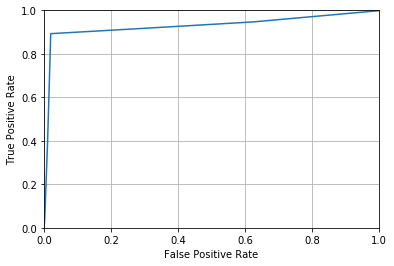

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings

if sys.version_info[0] < 3:
    warnings.warn("This script should run using Python 3, which is currently not the case. The plot might not generate correctly.")

path = '../ROC_dataset/'


def my_obstacle_filter(im, param):
    """ An example of a filter that can be used to generate ROC curves.
    This filter is a simple color filter around orange. Replace this with your own filter.

    :param im: image to be filtered
    :param param: filter parameter that will be varied between 0.0 and 1.0
    :return: filtered image where detected objects have a value of [255,255,255]
    """
    # Set up the filter based on the input parameter
    filter_width = np.array([0, 0, 0]) + param*255
    color_orange = np.array([255, 70, 0])

    w, h = im.size

    # Load pixel data
    im_pixels = np.asarray(im.getdata(), dtype=int)

    # Create mask for detected obstacles
    mask = np.all(im_pixels > color_orange - filter_width, axis=1) * np.all(im_pixels < color_orange + filter_width,
                                                                            axis=1)
    # Create image where obstacles are white
    filtered_im = Image.new('RGB', (w, h), color=(0, 0, 0))
    filtered_im_pixels = np.asarray(filtered_im.getdata())
    filtered_im_pixels[mask] = [255, 255, 255]
    filtered_im.putdata([tuple(pix) for pix in filtered_im_pixels])

    return filtered_im


def generate_ROC_plot():
    """ Generates a simple ROC plot"""
    plot_data = []
    n_images = 54    # Number of images in folder
    for param in np.linspace(0.0, 1.0, 10):
        # Initialize totals
        true_positives = 0
        false_positives = 0
        ground_truth_positives = 0
        ground_truth_negatives = 0

        for i in range(1, n_images + 1):
            # Set image paths
            # oringinal here is the addition orange-labeled image between original image and predicted label
            #change the path for other folders containing images from algorithm with diferrent parameters
            original_path = path + 'original/' + str(i) + '_original.png' 
            ground_truth_path = path + 'white/' + str(i) + '_mask.png'

            # Analyze ground truth image
            ground_truth_im = Image.open(ground_truth_path, 'r')
            ground_truth_pixels = np.asarray(ground_truth_im.getdata())
            ground_truth_obstacles = np.all(ground_truth_pixels == [255, 255, 255], axis=1)

            # Analyze original image
            im = Image.open(original_path, 'r')
            filtered_im = my_obstacle_filter(im, param)
            filtered_im_pixels = np.asarray(filtered_im.getdata())
            filtered_im_obstacles = np.all(filtered_im_pixels == [255, 255, 255], axis=1)

            # Update totals of positives/negatives
            true_positives += np.sum((filtered_im_obstacles == True) & (ground_truth_obstacles == True))
            false_positives += np.sum((filtered_im_obstacles == True) & (ground_truth_obstacles == False))

            ground_truth_positives += np.sum((ground_truth_obstacles == True))
            ground_truth_negatives += np.sum((ground_truth_obstacles == False))

        # Calculate rates
        false_positive_rate = false_positives / ground_truth_negatives
        true_positive_rate = true_positives / ground_truth_positives

        # Add datapoint to plot_data
        plot_data.append((false_positive_rate, true_positive_rate))

    # Create x and y data from plot_data
    x = [item[0] for item in plot_data]
    y = [item[1] for item in plot_data]
    print(x) #save the x,y data for each paramter setting, plot them in one comparison figure with matlab later
    print(y)

    # Plot    
    plt.plot(x, y)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid()
    plt.savefig('B32E300.png') #one plot for one parameter,save x,y data and plot curves for different kinds of paramter settings in matlab
    plt.show()


# Main script
generate_ROC_plot()


In [7]:
plt.savefig('B6E5.png')

<Figure size 432x288 with 0 Axes>